### Tarea 2


Estudiantes: Edwin Mejía y Jorge Bulgarelli.

**Instrucciones**

1. Crear un ambiente de trabajo (.ipynb) basado en PYTHON3 y llamarle Tarea-2.ipynb, con las librerías que considere oportuno, en especial debe contar con PANDAS.


2. El objetivo de la Tarea 2 consiste en elegir un dataset, ejecutar las diferentes tareas de pre-procesado y crear un tutorial sobre el uso de PANDAS considerando los siguientes aspectos:


3. Debe ser dirigido a una audiencia con poca experiencia en el tema, imagine que bajo su rol de Científico de Datos, le han asignado un colaborador junior al que usted le corresponde alinearlo con los procesos de aprendizaje automático, en particular con el uso de PANDAS en labores de pre-procesado.


4. Debe enfocarse en especial en aspectos al pre-procesado de datos.


5. Se recomienda el uso de un dataset ejemplo, que permita “jugar” con las diferentes técnicas de PANDAS para pre-procesado. Tome en cuenta que NO solo se trata de un ejercicio de pre-procesado de un dataset, sino que adicionalmente debe construir un TUTORIAL sobre el uso de PANDAS, usando como base el dataset elegido.


6. Recuerde seguir las buenas prácticas de comunicación efectiva, como parte de la notebook, utilizando los recursos que considere oportunos.


7. Recuerde llevar a cabo el EDA y explotar al máximo la visualización, puede usar matplotlib con estilos varios, pero se recomienda instalar al menos otra librería extra de visualización, como Bokeh o Seaborn. No olvide que el uso de la librería extra para la visualización, debe ser parte del tutorial.


8. Síentase en libertad de agregar cualquier “truco” que considere oportuno o feature reciente incorporado a PANDAS!


9. El entregable consiste en el url de la notebook Tarea-2.ipynb en GITHUB.
Subir al TEC Digital un archivo .txt simple con el url de la notebook (github, collab...que pueda ser accedido) a más tardar el día acordado en clase e indicado en el TEC Digital, envíos pasado el limite de entrega se aplicaría la penalización discutida en clase.

**Fuente**

<br>

Este dataset fue creado por Angeliki Xifara Ingeniera Civil y Estructural y fue procesado por Athanasios Tsanas de University of Oxford, UK.

Datos tomados de: https://archive.ics.uci.edu/ml/datasets/Energy+efficiency

Tiene 8 atributos (de X1 a X8) y 2 objetivos (y1 y y2)


Los nombres de las columnas son 

X1 Relative Compactness 

X2 Surface Area 

X3 Wall Area 

X4 Roof Area 

X5 Overall Height 

X6 Orientation 

X7 Glazing Area 

X8 Glazing Area Distribution 

y1 Heating Load 

y2 Cooling Load




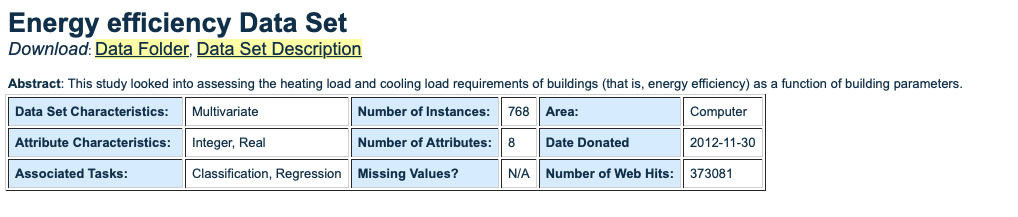

**Importar Librerías**

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import shapiro
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

import warnings
warnings.filterwarnings('ignore')

# La siguiente línea de código facilita la lectura de los datos,
# mostrando solamente 2 decimales de cada número pero sin realizar ningún cálculo.

pd.set_option('display.float_format','{:,.2f}'.format) 

Pandas es una librería que permite multiples manipulaciones de datos.

Seaborn es una librería especializada en gráficos estadísticos.

Matplotlib es una librería de visualización.

**Carga de Datos**

In [2]:
df = pd.read_excel('/Users/edwinmejia/Downloads/ENB2012_data.xlsx')
df.head()

,X1,X2,X3,X4,X5,X6,X7,X8,Y1,Y2
0,0.98,514.50,294.00,110.25,7.00,2,0.00,0,15.55,21.33
1,0.98,514.50,294.00,110.25,7.00,3,0.00,0,15.55,21.33
2,0.98,514.50,294.00,110.25,7.00,4,0.00,0,15.55,21.33
3,0.98,514.50,294.00,110.25,7.00,5,0.00,0,15.55,21.33
4,0.90,563.50,318.50,122.50,7.00,2,0.00,0,20.84,28.28


Como se observa los nombres de las columnas no son intuitivos con respecto a la información que contine cada columna. Esto se corrige reemplazando los nombres de las variables por su respectiva descripción. Esta descripción esta dada en la fuente de los datos. Lo primero es llevar cada descripción a una lista de Python.

In [3]:
column_names = [ 'Relative Compactness' , 'Surface Area' , 'Wall Area', \
                'Roof Area', 'Overall Height' , 'Orientation' , 'Glazing Area', \
                'Glazing Area Distribution', 'Heating Load',\
                'Cooling Load']

Con esta lista de descripciones podemos cargar nuevamente el dataset con los nombres asignados a partir de la lista anterior.

In [4]:
df = pd.read_excel('/Users/edwinmejia/Downloads/ENB2012_data.xlsx', names = column_names)
df.head()

,Relative Compactness,Surface Area,Wall Area,Roof Area,Overall Height,Orientation,Glazing Area,Glazing Area Distribution,Heating Load,Cooling Load
0,0.98,514.50,294.00,110.25,7.00,2,0.00,0,15.55,21.33
1,0.98,514.50,294.00,110.25,7.00,3,0.00,0,15.55,21.33
2,0.98,514.50,294.00,110.25,7.00,4,0.00,0,15.55,21.33
3,0.98,514.50,294.00,110.25,7.00,5,0.00,0,15.55,21.33
4,0.90,563.50,318.50,122.50,7.00,2,0.00,0,20.84,28.28


Como se observa, algunas de las descriciones de las columnas contienen espacios en blanco, este caracter puede generar interferencia durante el pre-procesamiento. Con la siguiente línea de código resolveremos ese problema. 

In [5]:
df.columns = [x.replace(' ', '_') for x in df.columns]
df.head()

,Relative_Compactness,Surface_Area,Wall_Area,Roof_Area,Overall_Height,Orientation,Glazing_Area,Glazing_Area_Distribution,Heating_Load,Cooling_Load
0,0.98,514.50,294.00,110.25,7.00,2,0.00,0,15.55,21.33
1,0.98,514.50,294.00,110.25,7.00,3,0.00,0,15.55,21.33
2,0.98,514.50,294.00,110.25,7.00,4,0.00,0,15.55,21.33
3,0.98,514.50,294.00,110.25,7.00,5,0.00,0,15.55,21.33
4,0.90,563.50,318.50,122.50,7.00,2,0.00,0,20.84,28.28


**Análisis Exploratorio de Datos (EDA)**

Confirmar si hay valores nulos y formatos de las columnas

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 10 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Relative_Compactness       768 non-null    float64
 1   Surface_Area               768 non-null    float64
 2   Wall_Area                  768 non-null    float64
 3   Roof_Area                  768 non-null    float64
 4   Overall_Height             768 non-null    float64
 5   Orientation                768 non-null    int64  
 6   Glazing_Area               768 non-null    float64
 7   Glazing_Area_Distribution  768 non-null    int64  
 8   Heating_Load               768 non-null    float64
 9   Cooling_Load               768 non-null    float64
dtypes: float64(8), int64(2)
memory usage: 60.1 KB


Con la función de librería Describe podremos observar como se compartan los datos del set datos por columna.

In [7]:
df.describe()

,Relative_Compactness,Surface_Area,Wall_Area,Roof_Area,Overall_Height,Orientation,Glazing_Area,Glazing_Area_Distribution,Heating_Load,Cooling_Load
count,768.00,768.00,768.00,768.00,768.00,768.00,768.00,768.00,768.00,768.00
mean,0.76,671.71,318.50,176.60,5.25,3.50,0.23,2.81,22.31,24.59
std,0.11,88.09,43.63,45.17,1.75,1.12,0.13,1.55,10.09,9.51
min,0.62,514.50,245.00,110.25,3.50,2.00,0.00,0.00,6.01,10.90
25%,0.68,606.38,294.00,140.88,3.50,2.75,0.10,1.75,12.99,15.62
50%,0.75,673.75,318.50,183.75,5.25,3.50,0.25,3.00,18.95,22.08
75%,0.83,741.12,343.00,220.50,7.00,4.25,0.40,4.00,31.67,33.13
max,0.98,808.50,416.50,220.50,7.00,5.00,0.40,5.00,43.10,48.03


Utilizando la función Pairplot de Seaborn visualizaremos gráficos por pares de datos.

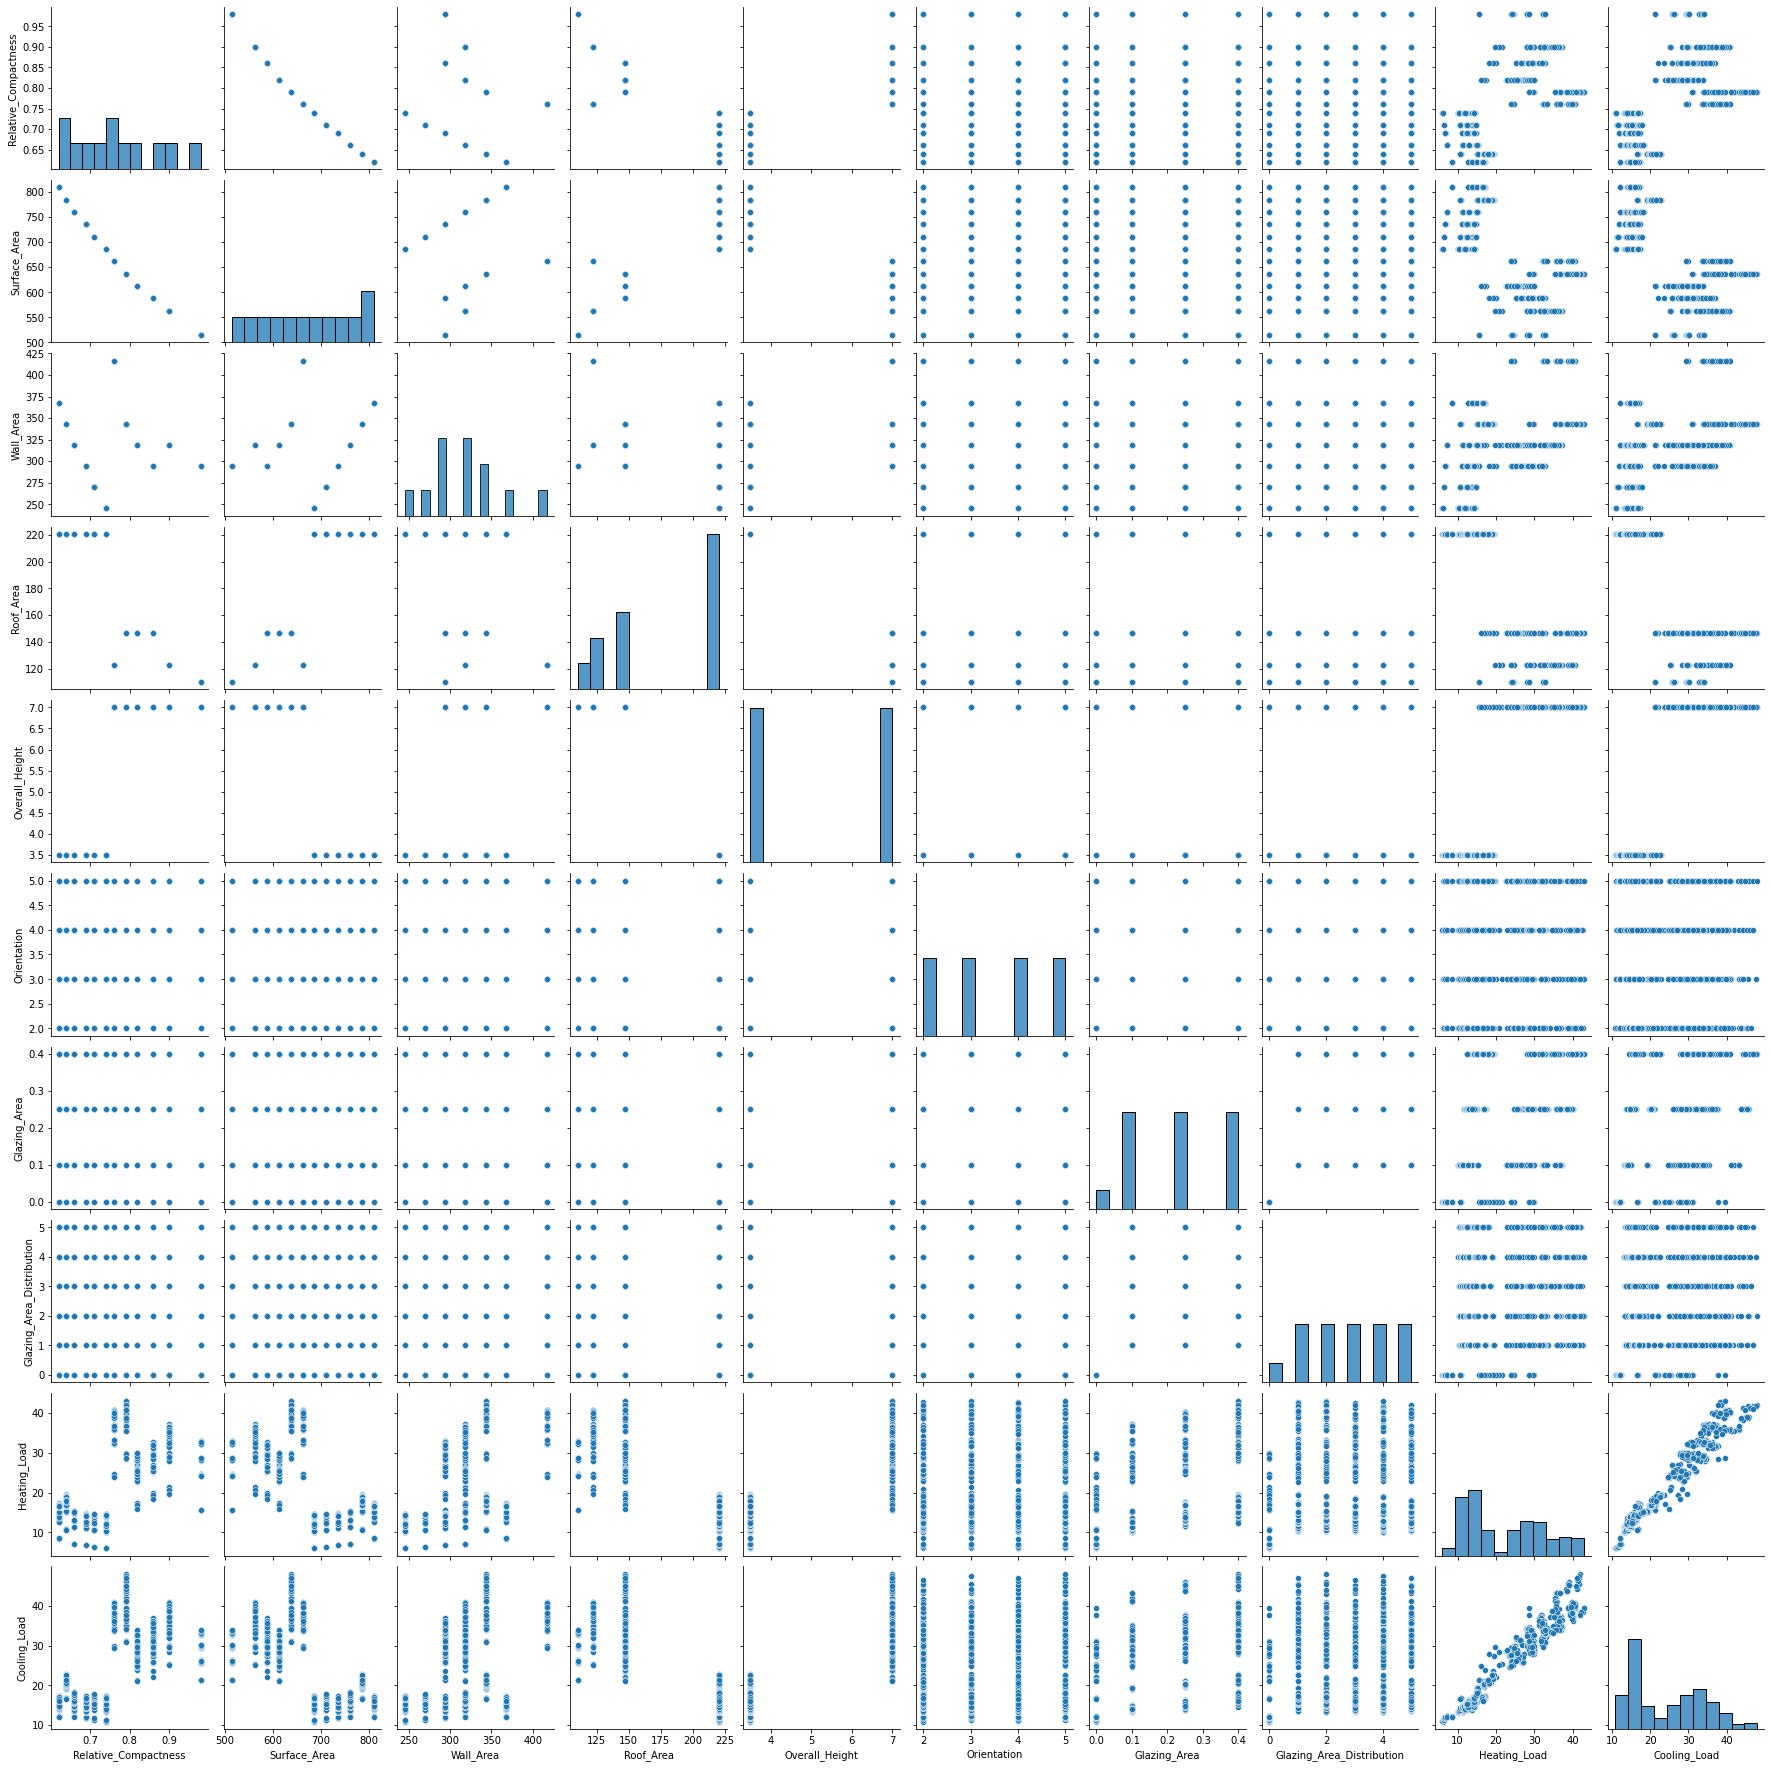

In [8]:
sns.pairplot(df);

La siguiente función es una ampliación de la función de librería heatmap de Seaborn. Con esta función es posible identificar correlaciones entre los atributos del set de datos.

In [9]:
def correlation_heatmap(df):
    _,ax=plt.subplots(figsize=(15,10))
    colormap=sns.diverging_palette(220,10,as_cmap=True)
    sns.heatmap(df.corr(),annot=True,cmap=colormap)

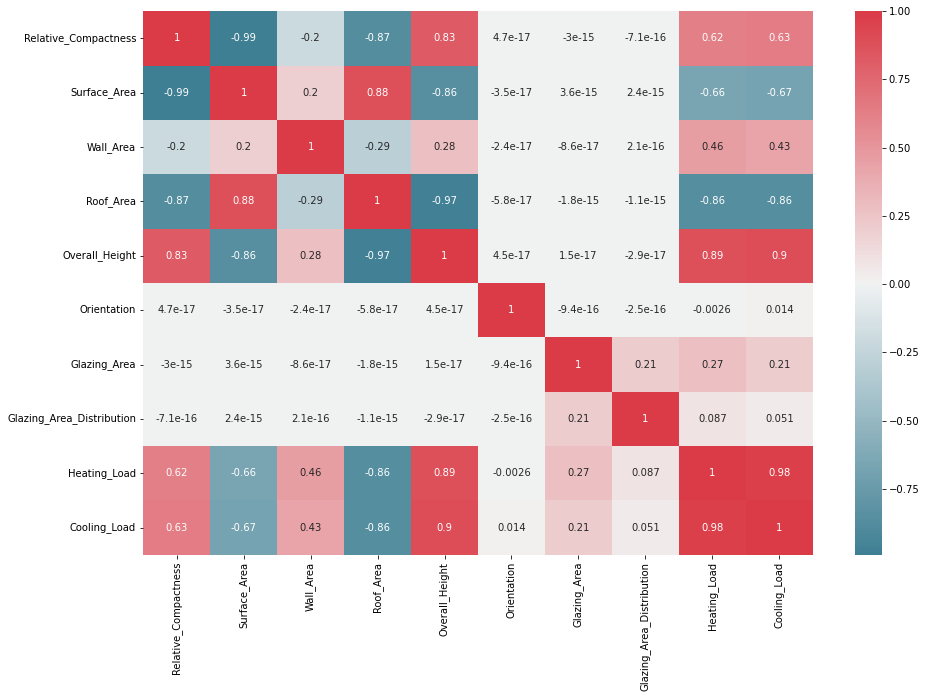

In [10]:
correlation_heatmap(df)

En nuestra área de aplicación la medida de correlación sirve para inferir una posible relación lineal entre 2 atributos ya sea que las 2 variables aumenten (correlación positiva) o que una aumente y la otra disminuya (correlación negativa).

Los atributos con una **correlación positiva** mas fuerte son: 

a) Heating_Load con Cooling_Load

b) Overall_Height con Cooling_Load

c) Surface_Area con Roof_Area

<br>

Mientras que se visualiza una fuerte **correlación negativa** en:

d) Surface_Area con Relative_Compactness

e) Roof_Area con Relative_Compactness

f) Roof_Area con Overall_Height


 **Visualización Usando Matplotlib**

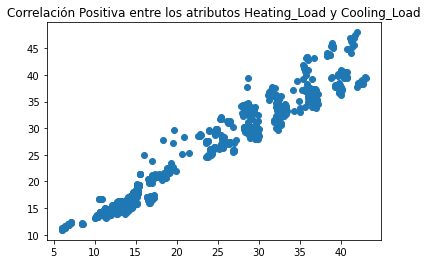

In [11]:
plt.scatter(x = df['Heating_Load'], y = df['Cooling_Load'] )
plt.title('Correlación Positiva entre los atributos Heating_Load y Cooling_Load')
plt.show()

La carga de calentamiento (Heating_Load) corresponde a la cantidad de calor necesaria añadir para que el edificio mantenga una temperatura constante cuando el entorno está a muy baja temperatura con respecto al interior. La carga de enfriamiento (Coling_Load) es la cantidad de calor necesario a extraer cuando  el entorno está a muy alta temperatura con respecto al interior. Dado que la misma barrera (concreto, paredes, cielos rasos, etc) actua en ambos casos tiene sentido que la correlación entre ambos atributos sea positiva.


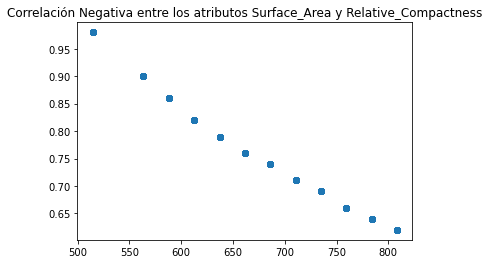

In [12]:
plt.scatter(x = df['Surface_Area'], y = df['Relative_Compactness'] )
plt.title('Correlación Negativa entre los atributos Surface_Area y Relative_Compactness')
plt.show()

El Relative_Compactness es una medida que determina que tanta área esta expuesta con respecto al volumen que encierra el edificio (en términos de contrucción y eficiencia energética es un factor clave). El área superficial (Surface_Area) corresponde al área expuesta. A mayor área hay menor compactación relativa porque es necesaria un área muy grande para cubrir un volumen relativamente pequeño. Otra forma de verlo es que al aumentar el volumen en una unidad el área superficial va a aumentar en más de una unidad y eso va a ocasionar que la compactación relativa disminuya dado que la compactación relativa es una función inversa del área superficial.

 **Definir si Estandarizar o Normalizar**

**Normalizar** consiste en reescalar los datos entre un rango de 0 y 1. Fórmula para normalización dada por:

$\displaystyle x \ normalizado = \frac{x \ - \ min(x)}{max(x)\ - \ min (x) }$

La normalización es una buena técnica para usar cuando no conoce la distribución de sus datos o cuando sabe que la distribución no es gaussiana (una curva de campana).

**Estandarizar** consiste en reescalar para obtener una media de 0 y una desviación estandar de 1. Fórmula para estandarización dada por:

$\displaystyle x \ estandarizado = \frac{x \ - \mu}{\sigma }$

Donde $\mu$ corrresponde a la media de los datos y  $\sigma$ a la desviación estándar de los datos. La estandarización asume que sus datos tienen una distribución gaussiana (curva de campana).


Para decidir cual transfomación aplicar es necesario probar la normalidad o no de la distribución de los datos. Hay formas de realizar estas pruebas para este caso usaremos 2 pruebas una visual y otra estadistica. 

**Prueba visual de distribución normal con librería Seaborn**

<AxesSubplot:ylabel='Density'>

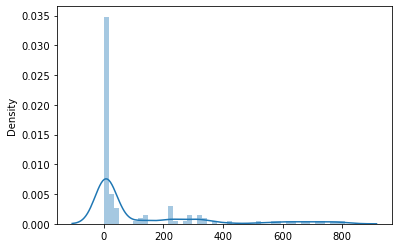

In [13]:
sns.distplot(df)

**Prueba estadística de distribución normal con librería Shapiro**

In [14]:
stat, p = shapiro(df)

print('stat=%.3f, p=%.3f\n' % (stat, p) )

if p > 0.05:
    print('Probabilidad Gausiana')
else:
    print('Probabilidad No Gausiana')

stat=0.635, p=0.000

Probabilidad No Gausiana


Ambas pruebas demuestran que el set de datos no presenta un distribución normal. Por lo que estaremos procediendo a Normalizar estos datos.

**Normalizar**

Conversión de dataframe a matriz mxn (arreglo de datos de Numpy) para utilización de la funcion de normalización de la librería Scikit Learn.

In [15]:
datos_para_normalizacion = np.array(df)
datos_para_normalizacion

array([[9.800e-01, 5.145e+02, 2.940e+02, ..., 0.000e+00, 1.555e+01,
        2.133e+01],
       [9.800e-01, 5.145e+02, 2.940e+02, ..., 0.000e+00, 1.555e+01,
        2.133e+01],
       [9.800e-01, 5.145e+02, 2.940e+02, ..., 0.000e+00, 1.555e+01,
        2.133e+01],
       ...,
       [6.200e-01, 8.085e+02, 3.675e+02, ..., 5.000e+00, 1.644e+01,
        1.711e+01],
       [6.200e-01, 8.085e+02, 3.675e+02, ..., 5.000e+00, 1.648e+01,
        1.661e+01],
       [6.200e-01, 8.085e+02, 3.675e+02, ..., 5.000e+00, 1.664e+01,
        1.603e+01]])

**Aplicar la funcion de normalización de la librería Scikit Learn**

In [16]:
scaler = MinMaxScaler()
scaler.fit(datos_para_normalizacion)
datos_normalizados = scaler.transform(datos_para_normalizacion)
datos_normalizados

array([[1.        , 0.        , 0.28571429, ..., 0.        , 0.25721219,
        0.28090493],
       [1.        , 0.        , 0.28571429, ..., 0.        , 0.25721219,
        0.28090493],
       [1.        , 0.        , 0.28571429, ..., 0.        , 0.25721219,
        0.28090493],
       ...,
       [0.        , 1.        , 0.71428571, ..., 1.        , 0.28120787,
        0.1672502 ],
       [0.        , 1.        , 0.71428571, ..., 1.        , 0.28228633,
        0.153784  ],
       [0.        , 1.        , 0.71428571, ..., 1.        , 0.28660016,
        0.13816321]])

**Convertir arreglo de datos de Numpy a Dataframe**

In [17]:
df_normalizado = pd.DataFrame(datos_normalizados)

# Reemplazar nombres de columnas para separación de subconjuntos de entrenamiento y prueba. 
df_normalizado.rename(columns = {0 : 'X1', 
                                 1: 'X2', 
                                 2 : 'X3', 
                                 3: 'X4' , 
                                 4 : 'X5', 
                                 5: 'X6', 
                                 6: 'X7', 
                                 7: 'X8',  
                                 8: 'y1', 
                                 9: 'y2'}, inplace = True)

df_normalizado.tail()

,X1,X2,X3,X4,X5,X6,X7,X8,y1,y2
763,0.06,0.92,0.57,1.00,0.00,1.00,1.00,1.00,0.32,0.28
764,0.00,1.00,0.71,1.00,0.00,0.00,1.00,1.00,0.28,0.16
765,0.00,1.00,0.71,1.00,0.00,0.33,1.00,1.00,0.28,0.17
766,0.00,1.00,0.71,1.00,0.00,0.67,1.00,1.00,0.28,0.15
767,0.00,1.00,0.71,1.00,0.00,1.00,1.00,1.00,0.29,0.14


 **Definir los subconjuntos de entrenamiento y de prueba y definir la proción de cada uno**

Con los datos transformados procederemos a separar en los subconjuntos de entrenamiento y de prueba utilizando una proporción de 80/20 mediante la función train_test_split de la librería sklearn.model_selection

In [18]:
datos_entrenamiento, datos_prueba = train_test_split(df_normalizado, test_size=0.2)

In [19]:
datos_entrenamiento.head()

,X1,X2,X3,X4,X5,X6,X7,X8,y1,y2
360,0.33,0.58,0.00,1.00,0.00,0.00,0.62,0.40,0.17,0.10
505,0.33,0.58,0.00,1.00,0.00,0.33,0.62,1.00,0.15,0.10
192,1.00,0.00,0.29,0.00,1.00,0.00,0.25,0.80,0.50,0.40
169,0.33,0.58,0.00,1.00,0.00,0.33,0.25,0.60,0.12,0.07
377,0.06,0.92,0.57,1.00,0.00,0.33,0.62,0.40,0.29,0.26


In [20]:
datos_prueba.head()

,X1,X2,X3,X4,X5,X6,X7,X8,y1,y2
663,0.11,0.83,0.43,1.00,0.00,1.00,1.00,0.60,0.24,0.20
254,0.56,0.33,0.43,0.33,1.00,0.67,0.25,1.00,0.46,0.48
715,0.06,0.92,0.57,1.00,0.00,1.00,1.00,0.80,0.35,0.31
182,0.11,0.83,0.43,1.00,0.00,0.67,0.25,0.60,0.15,0.07
241,1.00,0.00,0.29,0.00,1.00,0.33,0.25,1.00,0.49,0.41


 **Separar las columnas de atributos de los objetivos para cada subconjunto**

In [21]:
atributos_prueba = datos_prueba.iloc[: , :8]
atributos_prueba.head()

,X1,X2,X3,X4,X5,X6,X7,X8
663,0.11,0.83,0.43,1.00,0.00,1.00,1.00,0.60
254,0.56,0.33,0.43,0.33,1.00,0.67,0.25,1.00
715,0.06,0.92,0.57,1.00,0.00,1.00,1.00,0.80
182,0.11,0.83,0.43,1.00,0.00,0.67,0.25,0.60
241,1.00,0.00,0.29,0.00,1.00,0.33,0.25,1.00


In [22]:
atributos_entrenamiento = datos_entrenamiento.iloc[: , :8]
atributos_entrenamiento.head()

,X1,X2,X3,X4,X5,X6,X7,X8
360,0.33,0.58,0.00,1.00,0.00,0.00,0.62,0.40
505,0.33,0.58,0.00,1.00,0.00,0.33,0.62,1.00
192,1.00,0.00,0.29,0.00,1.00,0.00,0.25,0.80
169,0.33,0.58,0.00,1.00,0.00,0.33,0.25,0.60
377,0.06,0.92,0.57,1.00,0.00,0.33,0.62,0.40


In [23]:
objetivos_entrenamiento = datos_entrenamiento.iloc[: , 8:10]
objetivos_entrenamiento.head()

,y1,y2
360,0.17,0.10
505,0.15,0.10
192,0.50,0.40
169,0.12,0.07
377,0.29,0.26


In [24]:
objetivos_prueba = datos_prueba.iloc[: , 8:10]
objetivos_prueba.head()

,y1,y2
663,0.24,0.20
254,0.46,0.48
715,0.35,0.31
182,0.15,0.07
241,0.49,0.41


En este punto nuestros datos están listos para ser procesados.